# ECON 220 - Data Science for Economists
## Week 10 - The Central Limit Theorem
### Instructor: Jafet Baca-Obando

## Step 1. Import required packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import os
path = os.getcwd()

## Step 2. Load the dataset

In [2]:
data = pd.read_csv("income.csv")
data.head(10)

,AGE,INCTOT
0,39,89500
1,61,32000
2,36,33000
3,34,10000
4,46,35000
5,88,39000
6,58,241800
7,20,12000
8,69,15000
9,47,150000


## Step 3. Sampling distribution of the sample mean

Let's explore the distribution of personal income using a histogram.

**Practice.** How do we code this in Python?

Text(0.5, 1.0, 'Distribution of Age')

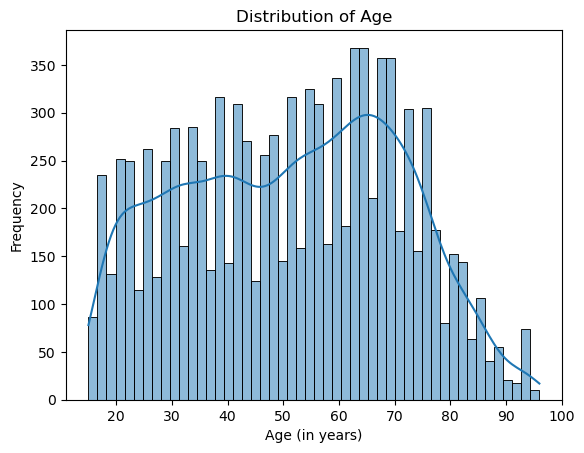

In [3]:
sns.histplot(data['AGE'], bins=50, kde=True)
plt.xlabel('Age (in years)')
plt.ylabel('Frequency')
plt.title('Distribution of Age')

Assume that our dataset is our population. 

Let us run a simulation. Instead of looking at the whole population, let's look at _sample means_.

1. Take a random sample of size 50 from the population.
2. Compute the sample mean.
3. Repeat this process 10,000 times.

In [4]:
N = 10000  # Number of samples
n = 50     # Sample size
sample_means = [] # List to store sample means
for _ in range(N):
    sample = data['AGE'].sample(n, replace=True)
    sample_means.append(sample.mean())

**Practice**. Plot the distribution of the sample mean.

51.4191 2.755080425435


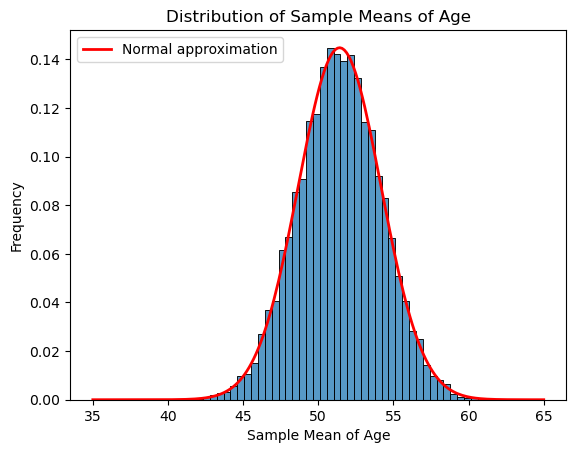

In [13]:
mu = data['AGE'].mean()
sigma = data['AGE'].std()/np.sqrt(n)
print(mu, sigma)

sns.histplot(sample_means, bins=50, stat='density')
x = np.linspace(35, 65, 200)
plt.plot(x, stats.norm.pdf(x, mu, sigma), color='red', lw=2, label=f'Normal approximation')
plt.xlabel('Sample Mean of Age')
plt.ylabel('Frequency')
plt.title('Distribution of Sample Means of Age')
plt.legend()

Compare this with the population mean.

This looks like a normal distribution. In fact, this is the Central Limit Theorem in action!

**Central Limit Theorem (CLT)** states that the sampling distribution of the sample mean approaches a normal distribution as the sample size increases, regardless of the population's distribution, provided the samples are independent and identically distributed (i.i.d.) and the sample size is sufficiently large.

A rule of thumb is that a sample size of 30 or more is generally considered sufficient for the CLT to hold.

## Step 5. Sampling distribution for a sample proportion

- Proportion $Y=\frac{X}{n}$, so $X \sim Binom(n,p)$. ($X$ is the number of successes, and $Y$ is the proportion of successes)
- We claim that proportion $Y \sim Norm\left(p, \sqrt{\frac{p(1-p)}{n}}\right)$ by CLT.
- If this is true, we can rely on the Normal distribution to work with proportion.

Consider the following example: If the unemployment rate in a population is 3.8%, what is the probability that in a sample of 100 individuals, 3 or fewer are unemployed?

In [ ]:
stats.binom.cdf(3, 100, 0.038)

0.6686295665412463

Now, let's simulate the proportion of successes in samples of size 100 from a population with a success probability of 3.8%.

In [22]:
N = 10000  # Number of samples
n = 25     # Sample size
p = 0.038  # Success probability
sample_proportions = [] # List to store sample proportions
for _ in range(N):
    sample = stats.binom.rvs(n=n, p=p)
    proportion = sample/n
    sample_proportions.append(proportion)

Let's plot the distribution of sample proportions and overlap a normal distribution with mean $p$ and standard deviation $\sqrt{\frac{p(1-p)}{n}}$.

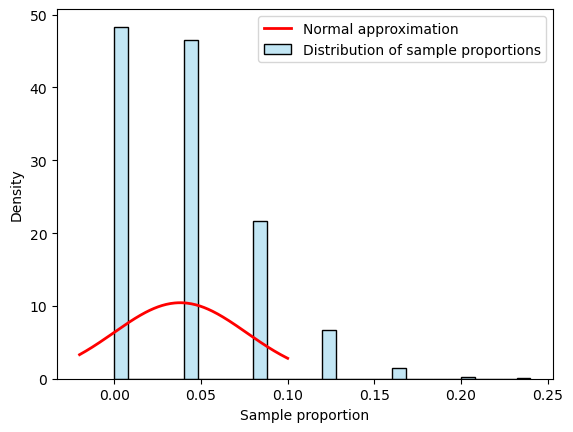

In [23]:
mu = p
sigma = np.sqrt(p * (1 - p) / n)

# Plot proportions and normal distribution with correct parameters
sns.histplot(sample_proportions, bins=30, stat='density', color='skyblue', alpha=0.5, label='Distribution of sample proportions')
x = np.linspace(-0.02, 0.1, 200)
plt.plot(x, stats.norm.pdf(x, mu, sigma), color='red', lw=2, label=f'Normal approximation')
plt.xlabel('Sample proportion')
plt.ylabel('Density')
plt.legend()

In [42]:
!jupyter nbconvert --to html "Week 10. Central Limit Theorem.ipynb"

[NbConvertApp] Converting notebook Week 10. Central Limit Theorem.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 5 image(s).
[NbConvertApp] Writing 489373 bytes to Week 10. Central Limit Theorem.html
